In [ ]:
!pip install keras cython h5py

In [ ]:
!pip install opencv-python

# Capstone Project: 
  ## Flowers Classification using Convolutional Neural Networks

In [2]:
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.
Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from keras.activations import relu, softmax
from keras.optimizers import Adam

In [4]:
from PIL import Image
import random
import pickle

In [177]:
import cv2
import os
# import urllib.request
# from urllib.request import Request, urlopen
# from urllib.error import URLError
# import socket  
# socket.setdefaulttimeout(1)

In [6]:
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [7]:
from keras.models import model_from_json

In [264]:
import matplotlib.pyplot as plt
import pylab as pl

## Data Collection

### Scrap images from http://www.image-net.org 


In [6]:
# category={'Sunflower':'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n11978961',
#           'Peony':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11719286',
#           'Nigella':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11736851',
#           'Spathiphyllum':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11792341',
#           'Ragged_robin':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11811706',
#           'Soapwort':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11814584',
#           'Ice_plant':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11821184',
#           'Spring_beauty':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11859472',
#           'African_daisy':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11925303',
#           'Cornflower':'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n11947802'
#           }

In [7]:
# import cv2
# import os
# import urllib.request
# from urllib.request import Request, urlopen
# from urllib.error import URLError
# import socket  
# socket.setdefaulttimeout(1)



# def get_urls(urls_links):
#     url_list=urllib.request.urlopen(urls_links).read().decode().split('\r\n')
#     return url_list

In [8]:
# def download_images(urls_link,category_name):
#     if not os.path.exists(category_name):
#         os.makedirs(category_name)
#     count=1
#     url_list=get_urls(urls_link)
#     for url in url_list:
#         try:
#             path_name=str(category_name)+'/'+str(count)+'.'+str(category_name)+'.jpg'
#             urllib.request.urlretrieve(url,path_name)
             
#             img=cv2.imread(path_name)
#             resized_image=cv2.resize(img,(100,100))
#             cv2.imwrite(path_name,resized_image)
#         except Exception as e:
#             print(str(count)+str(e))
#         count+=1

In [9]:
# for cate in category:
#     download_images(category['cate'],cate)


## Data Preprocessing 

In [9]:
all_image_dir='all_flower_images'

In [10]:
def label_img(img):
    img_label = img.split('.')[-2]
    return img_label

In [11]:
def jpg_image_to_array(path):
    """
  Loads JPEG image into 3D Numpy array of shape 
  (width, height, channels)
  """
    img=Image.open(path)
    img_arr=np.asarray(img).reshape((img.size[1], img.size[0],3))
    return img_arr
    

In [12]:
def create_image_list(image_dir):
    img_dataset=[]
#     label_dataset=[]
    for img in os.listdir(image_dir):
        try: 
            img_path=str(image_dir)+'/'+str(img)
            image_array=jpg_image_to_array(img_path)
            label=label_img(img)
            img_dataset.append([image_array])  
#             label_dataset.append([label])

        except Exception as e:
            print(str(e))
#     np.save('image_dataset.npy',img_dataset)
#     return img_dataset

    img_list_arr=np.array(img_dataset)
    len_img_list=img_list_arr.shape[0]
    img_list_arr_reshape=img_list_arr.reshape(len_img_list,100,100,3)


    return img_list_arr_reshape

In [13]:
image_list_arr=create_image_list(all_image_dir)

cannot identify image file 'all_flower_images/.DS_Store'
cannot reshape array of size 16320 into shape (120,136,3)
cannot reshape array of size 12100 into shape (110,110,3)
cannot identify image file 'all_flower_images/370.Ragged_robin.jpg'
cannot reshape array of size 7000 into shape (70,100,3)
cannot reshape array of size 9216 into shape (96,96,3)
cannot identify image file 'all_flower_images/438.Spring_beauty.jpg'
cannot reshape array of size 90000 into shape (300,300,3)
cannot identify image file 'all_flower_images/472.Sunflower.jpg'
cannot reshape array of size 7000 into shape (70,100,3)
cannot identify image file 'all_flower_images/725.Spring_beauty.jpg'
cannot reshape array of size 2700 into shape (60,45,3)
cannot reshape array of size 36936 into shape (216,171,3)
cannot reshape array of size 13440 into shape (120,112,3)


In [14]:
image_list_arr.shape

(11755, 100, 100, 3)

In [15]:
def create_label_list(image_dir):
#     img_dataset=[]
    label_dataset=[]
    for img in os.listdir(image_dir):
        try: 
            img_path=str(image_dir)+'/'+str(img)
            image_array=jpg_image_to_array(img_path)
            label=label_img(img)
#             img_dataset.append([image_array])  
            label_dataset.append([label])

        except Exception as e:
            print(str(e))
#     np.save('image_dataset.npy',img_dataset)
#     return img_dataset

    labels_list_arr=np.array(label_dataset)

    return labels_list_arr

In [16]:
label_list_arr=create_label_list(all_image_dir)

cannot identify image file 'all_flower_images/.DS_Store'
cannot reshape array of size 16320 into shape (120,136,3)
cannot reshape array of size 12100 into shape (110,110,3)
cannot identify image file 'all_flower_images/370.Ragged_robin.jpg'
cannot reshape array of size 7000 into shape (70,100,3)
cannot reshape array of size 9216 into shape (96,96,3)
cannot identify image file 'all_flower_images/438.Spring_beauty.jpg'
cannot reshape array of size 90000 into shape (300,300,3)
cannot identify image file 'all_flower_images/472.Sunflower.jpg'
cannot reshape array of size 7000 into shape (70,100,3)
cannot identify image file 'all_flower_images/725.Spring_beauty.jpg'
cannot reshape array of size 2700 into shape (60,45,3)
cannot reshape array of size 36936 into shape (216,171,3)
cannot reshape array of size 13440 into shape (120,112,3)


In [17]:
label_list_arr.shape

(11755, 1)

In [18]:
import random

In [19]:

def train_test_split(X, y , percentage_of_train):
    a = X
    b = y
    c = list(zip(a,b))
    random.shuffle(c)
    a1, b1 = zip(*c)
    a2=np.array(a1)
    b2=np.array(b1)
    a2=a2.reshape(a.shape[0], 100, 100, 3)
    
    percentage=int(a.shape[0]*percentage_of_train)
    
    XX_train=a2[:percentage]
    XX_test=a2[percentage:]
    yy_train=b2[:percentage]
    yy_test=b2[percentage:]
    
    return XX_train, XX_test, yy_train, yy_test

In [20]:
X_train, X_test, y_train, y_test=train_test_split(image_list_arr,label_list_arr,0.8)

In [21]:
y_train.shape

(9404, 1)

In [22]:
y_test.shape

(2351, 1)

In [249]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train_rescale=X_train/255
X_test_rescale=X_test/255


In [38]:
X_test.shape

(2351, 100, 100, 3)

In [250]:
X_test_rescale

array([[[[ 0.3019608 ,  0.28235295,  0.27058825],
         [ 0.29019609,  0.24705882,  0.22352941],
         [ 0.17254902,  0.13333334,  0.09803922],
         ..., 
         [ 0.4509804 ,  0.38039216,  0.37254903],
         [ 0.45490196,  0.40000001,  0.39607844],
         [ 0.41176471,  0.37254903,  0.36862746]],

        [[ 0.3019608 ,  0.28627452,  0.29019609],
         [ 0.29803923,  0.26666668,  0.25882354],
         [ 0.27058825,  0.23137255,  0.22352941],
         ..., 
         [ 0.44705883,  0.39215687,  0.38039216],
         [ 0.42352942,  0.38431373,  0.3764706 ],
         [ 0.42352942,  0.40784314,  0.39607844]],

        [[ 0.28627452,  0.28235295,  0.30588236],
         [ 0.34117648,  0.32941177,  0.35686275],
         [ 0.3019608 ,  0.27843139,  0.29411766],
         ..., 
         [ 0.36862746,  0.33333334,  0.30588236],
         [ 0.40392157,  0.38431373,  0.36078432],
         [ 0.36470589,  0.36078432,  0.34117648]],

        ..., 
        [[ 0.35686275,  0.29411766,

In [26]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_1hot = encoder.fit_transform(y_train)
y_test_1hot=encoder.fit_transform(y_test)


In [494]:
y_train_1hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
y_test_1hot

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# y_train_test11 = keras.utils.to_categorical(y_train_test1, 10)
# y_test_test11 = keras.utils.to_categorical(y_test_test1, 10)

## Model Building

In [ ]:
from keras import optimizers
sgd = optimizers.SGD(lr=.2, momentum=0.9, nesterov=True)

## Data Augmentation

In [ ]:

'''
50 100 0.15 0.25 0.25 32 lr=0.4 150 =0.7 
    
 70 100 0.1 0.2 0.2 32 lr=0.4 150     =0.7

 70 100 0.1 0.2 0.2 128 lr= 0.4 150  = 0.71
 
 70 100 xx xx xx  128 lr=0.4    150  =0.71 
 
 30 60 xx xx xx  128 lr= 0.3   200  =0.74
 
''' 
 
    
    
    

In [ ]:
#try4________________________________________________________

In [147]:
cnn18 = Sequential([
    Conv2D(30, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(100,100,3)),
#     Dropout(.1),
    MaxPool2D((2,2)),
    
    Conv2D(60, (3, 3), activation='relu'),
#     BatchNormalization(axis=-1),
#     Dropout(.2),
    MaxPool2D((2,2)),
    
#     Conv2D(60, (3, 3), activation='relu'),
#     BatchNormalization(axis=-1),
#     Dropout(.25),
#     MaxPool2D((2,2)),
    
#     Conv2D(80, (3, 3), activation='relu'),
#     BatchNormalization(axis=-1),
#     Dropout(.25),
#     MaxPool2D((2,2)),
    
#     Conv2D(100, (3, 3), activation='relu'),
#     Dropout(.5),
#     MaxPool2D((2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
#     BatchNormalization(axis=-1),
#     Dropout(.2),
    Dense(10, activation='softmax')
])

In [148]:
cnn18.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 98, 98, 30)        840       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 49, 49, 30)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 47, 47, 60)        16260     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 23, 23, 60)        0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 31740)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 128)               4062848   
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1290      
Total para

In [149]:
cnn18.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.3),
#               optimizer=Adam(lr=0.2),
#               optimizer=sgd,
              metrics=['accuracy'])



In [150]:
imgen_train2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

imgen_test2=ImageDataGenerator(rescale=1./255)




In [151]:
train_generator4 = imgen_train2.flow(X_train, y_train_1hot, batch_size=64)
test_generator4 = imgen_test2.flow(X_test, y_test_1hot, batch_size=64)




In [153]:
cnn18.fit_generator(train_generator4, steps_per_epoch=X_train.shape[0] // 64, epochs=200, 
                    validation_data=test_generator4, validation_steps=len(y_test_1hot)//64)

Epoch 1/200
146/146 [==============================] - 17s - loss: 1.8002 - acc: 0.3592 - val_loss: 1.6338 - val_acc: 0.4562
Epoch 2/200
146/146 [==============================] - 16s - loss: 1.5500 - acc: 0.4639 - val_loss: 1.4442 - val_acc: 0.5146
Epoch 3/200
146/146 [==============================] - 16s - loss: 1.4300 - acc: 0.5114 - val_loss: 1.4341 - val_acc: 0.5247
Epoch 4/200
146/146 [==============================] - 16s - loss: 1.3757 - acc: 0.5352 - val_loss: 1.3412 - val_acc: 0.5588
Epoch 5/200
146/146 [==============================] - 16s - loss: 1.2983 - acc: 0.5634 - val_loss: 1.2718 - val_acc: 0.5960
Epoch 6/200
146/146 [==============================] - 16s - loss: 1.2428 - acc: 0.5839 - val_loss: 1.3131 - val_acc: 0.5697
Epoch 7/200
146/146 [==============================] - 16s - loss: 1.2529 - acc: 0.5750 - val_loss: 1.2301 - val_acc: 0.5903
Epoch 8/200
146/146 [==============================] - 16s - loss: 1.1863 - acc: 0.6018 - val_loss: 1.2245 - val_acc: 0.6030


146/146 [==============================] - 16s - loss: 0.8621 - acc: 0.7148 - val_loss: 0.9442 - val_acc: 0.6970
Epoch 67/200
146/146 [==============================] - 16s - loss: 0.8411 - acc: 0.7243 - val_loss: 0.9304 - val_acc: 0.6957
Epoch 68/200
146/146 [==============================] - 16s - loss: 0.8517 - acc: 0.7195 - val_loss: 0.8845 - val_acc: 0.7153
Epoch 69/200
146/146 [==============================] - 16s - loss: 0.8256 - acc: 0.7285 - val_loss: 0.9106 - val_acc: 0.7040
Epoch 70/200
146/146 [==============================] - 16s - loss: 0.8365 - acc: 0.7240 - val_loss: 0.9698 - val_acc: 0.6882
Epoch 71/200
146/146 [==============================] - 16s - loss: 0.8320 - acc: 0.7248 - val_loss: 0.8926 - val_acc: 0.7101
Epoch 72/200
146/146 [==============================] - 16s - loss: 0.8443 - acc: 0.7196 - val_loss: 0.9039 - val_acc: 0.7088
Epoch 73/200
146/146 [==============================] - 16s - loss: 0.8294 - acc: 0.7250 - val_loss: 0.9174 - val_acc: 0.7014
Epoch

146/146 [==============================] - 16s - loss: 0.6477 - acc: 0.7821 - val_loss: 0.8229 - val_acc: 0.7403
Epoch 195/200
146/146 [==============================] - 16s - loss: 0.6415 - acc: 0.7857 - val_loss: 0.8316 - val_acc: 0.7350
Epoch 196/200
146/146 [==============================] - 16s - loss: 0.6386 - acc: 0.7870 - val_loss: 0.8456 - val_acc: 0.7272
Epoch 197/200
146/146 [==============================] - 16s - loss: 0.6356 - acc: 0.7892 - val_loss: 0.7875 - val_acc: 0.7455
Epoch 198/200
146/146 [==============================] - 16s - loss: 0.6411 - acc: 0.7895 - val_loss: 0.8324 - val_acc: 0.7390
Epoch 199/200
146/146 [==============================] - 16s - loss: 0.6343 - acc: 0.7900 - val_loss: 0.7903 - val_acc: 0.7499
Epoch 200/200
146/146 [==============================] - 16s - loss: 0.6347 - acc: 0.7916 - val_loss: 0.8105 - val_acc: 0.7298


In [158]:
# serialize model to JSON

cnn18_json = cnn18.to_json()

with open("cnn18.json", "w") as json_file:
    json_file.write(cnn18_json)
    
# serialize weights to HDF5
cnn18.save_weights("cnn18.h5")
print("Saved model to disk")


Saved model to disk


In [8]:
# load json and create model
json_file = open('cnn18.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnn18.h5")
print("Loaded model from disk")

Loaded model from disk


In [34]:
# evaluate loaded model on test data
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.3),
#               optimizer=Adam(lr=0.2),
#               optimizer=sgd,
              metrics=['accuracy'])

score2 = loaded_model.evaluate(X_test_rescale, y_test_1hot, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score2[1]*100))

acc: 78.52%


### Prediction

In [198]:
def image_for_predict(im):
    resized_image=cv2.resize(im,(100,100))
    img_arr=np.asarray(resized_image).reshape((1,resized_image.shape[1], resized_image.shape[0],3))
    X_test = img_arr.astype('float32')
    X_test_rescale=X_test/255
    return X_test_rescale
   

In [129]:
def predict_one_image(model,image):
    y_pred_probas1 = model.predict(image)
    y_pred = np.argmax(y_pred_probas1)
    
    result_array=np.array([0,0,0,0,0,0,0,0,0,0])
    result_array[y_pred]=1
    result_array_reshape=result_array.reshape(1,10)
    
    result = encoder.inverse_transform(result_array_reshape)
    return result
    

In [140]:
test_predict_image1=X_test_rescale[88].reshape(1,100,100,3)

In [141]:
predict_one_image(loaded_model,test_predict_image1)

array(['Peony'], 
      dtype='<U13')

In [162]:
# flower_dir={
#     0:'African_daisy',
#     1:'Cornflower',
#     2:'Ice_plant',
#     3:'Nigella',
#     4:'Peony',
#     5:'Ragged_robin',
#     6:'Soapwort',
#     7:'Spathiphyllum',
#     8:'Spring_beauty',
#     9:'Sunflower'
# }

In [ ]:

# save the model to disk
# pickle.dump(cnn18, open('cnn18.sav', 'wb'))


# load the model from disk
# loaded_model1 = pickle.load(open('cnn1.sav', 'rb'))



In [461]:
test_sunflower8 = cv2.imread('all_flower_images/1509.Sunflower.jpg')
test_peony8 = cv2.imread('all_flower_images/1502.Peony.jpg')

In [462]:
test_sunflower_4d=image_for_predict(test_sunflower8)
test_peony_4d=image_for_predict(test_peony8)

In [463]:
test_sunflower_for_predict=image_for_predict(test_sunflower8).reshape(100,100,3)
test_peony_for_predict=image_for_predict(test_peony8).reshape(100,100,3)



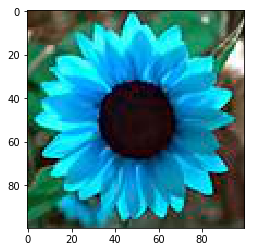

In [223]:
preview_sunflower = plt.imshow(test_sunflower_for_predict)
plt.show()

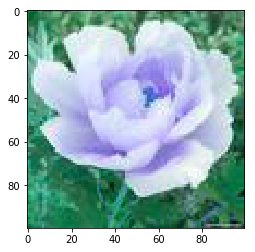

In [224]:
preview_peony = plt.imshow(test_peony_for_predict)
plt.show()

In [470]:
test_sunflower_4d.shape

(1, 100, 100, 3)

In [489]:
cnn18_display2 = Sequential()
cnn18_display2.add(Conv2D(3, kernel_size=(3, 3),
                 input_shape=(100,100,3))) 

In [490]:
conv_sunflower=cnn18_display2.predict(test_sunflower_4d)

In [491]:
def visualize_flower(flower):
    flo=np.squeeze(flower,axis=0)
    print (flo.shape)
    plt.imshow(flo)
    plt.show()

(98, 98, 3)


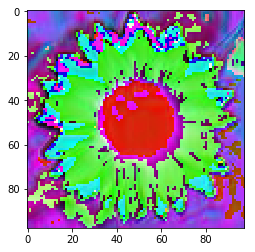

In [492]:
visualize_flower(conv_sunflower)

## Convolution visualizations
### cnn_18_display 
### (Demo only)

In [ ]:
import theano

In [266]:
import matplotlib.cm as cm

In [245]:
cnn18_display = Sequential()

cnn18_display.add(Conv2D(30, kernel_size=(3, 3),
                 input_shape=(100,100,3))) 
convout1 = Activation('relu')
cnn18_display.add(convout1)
cnn18_display.add(MaxPool2D((2, 2)))

cnn18_display.add(Conv2D(60, (3, 3)))                  
convout2 = Activation('relu')
cnn18_display.add(convout2)
cnn18_display.add(MaxPool2D((2, 2)))
          


cnn18_display.add(Flatten())
cnn18_display.add(Dense(128, activation='relu'))

cnn18_display.add(Dense(10, activation='softmax'))


cnn18_display.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.3),
#               optimizer=Adam(lr=0.2),
#               optimizer=sgd,
              metrics=['accuracy'])

In [246]:
cnn18_display.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 30)        840       
_________________________________________________________________
activation_3 (Activation)    (None, 98, 98, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 60)        16260     
_________________________________________________________________
activation_4 (Activation)    (None, 47, 47, 60)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 60)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31740)             0         
__________

In [253]:
cnn18_display.fit(X_train_rescale, y_train_1hot, validation_split=.2, epochs=5)

Train on 7523 samples, validate on 1881 samples
Epoch 1/5
7523/7523 [==============================] - 103s - loss: 1.6454 - acc: 0.4327 - val_loss: 1.7561 - val_acc: 0.3966
Epoch 2/5
7523/7523 [==============================] - 104s - loss: 1.3549 - acc: 0.5470 - val_loss: 1.4370 - val_acc: 0.5045
Epoch 3/5
7523/7523 [==============================] - 104s - loss: 1.1915 - acc: 0.6103 - val_loss: 1.4805 - val_acc: 0.4976
Epoch 4/5
7523/7523 [==============================] - 105s - loss: 1.0805 - acc: 0.6556 - val_loss: 1.4141 - val_acc: 0.5167
Epoch 5/5
7523/7523 [==============================] - 104s - loss: 0.9832 - acc: 0.6870 - val_loss: 1.4987 - val_acc: 0.5024


In [260]:
from keras import backend as K

In [261]:
# K.learning_phase() is a flag that indicates if the network is in training or
# predict phase. It allow layer (e.g. Dropout) to only be applied during training
inputs = [K.learning_phase()] + cnn18_display.inputs

_convout1_f = K.function(inputs, [convout1.output])
def convout1_f(X):
    # The [0] is to disable the training phase flag
    return _convout1_f([0] + [X])

In [311]:
inputs = [K.learning_phase()] + cnn18_display.inputs

_convout2_f = K.function(inputs, [convout2.output])
def convout2_f(X):
    # The [0] is to disable the training phase flag
    return _convout2_f([0] + [X])

In [308]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)
    pl.show()

In [294]:
test_sunflower_for_display=image_for_predict(test_sunflower)
test_sunflower_for_display.shape

(1, 100, 100, 3)

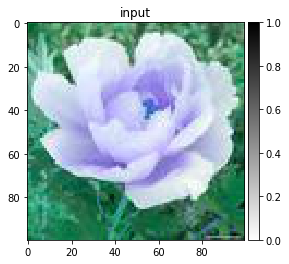

In [363]:
# Visualize the first layer of convolutions on an input image
X = test_peony2
pl.figure()
pl.title('input')
flower_image=nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)


In [336]:
C1.shape[0:2]

(98, 98)

In [341]:
ddddd=6*98+5
ma.masked_all((3,3))

masked_array(data =
 [[-- -- --]
 [-- -- --]
 [-- -- --]],
             mask =
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]],
       fill_value = 1e+20)

In [351]:
C1.reshape(30,98,98)[1]

array([[ 26.17295074,  39.70990372,   0.        , ...,   9.70814419,
          0.        ,   1.00507796],
       [ 14.19150925,   0.        ,   2.03038526, ...,  13.614501  ,
         60.01481247,  10.80819607],
       [ 13.20535183,   0.        ,   0.        , ...,   0.        ,
         52.77131271,  56.3646698 ],
       ..., 
       [  0.        ,  11.9465847 ,  58.53059006, ...,  15.55350113,
         11.00073338,   0.        ],
       [  0.        ,  24.30467224,   0.        , ...,  29.03567123,
          0.        ,   0.        ],
       [  0.        ,  68.10700989,   0.        , ...,  16.19389153,
          0.        ,  90.66222382]], dtype=float32)

In [352]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

# pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

### Visualize convolution result (after activation)

C1 shape :  (30, 98, 98)


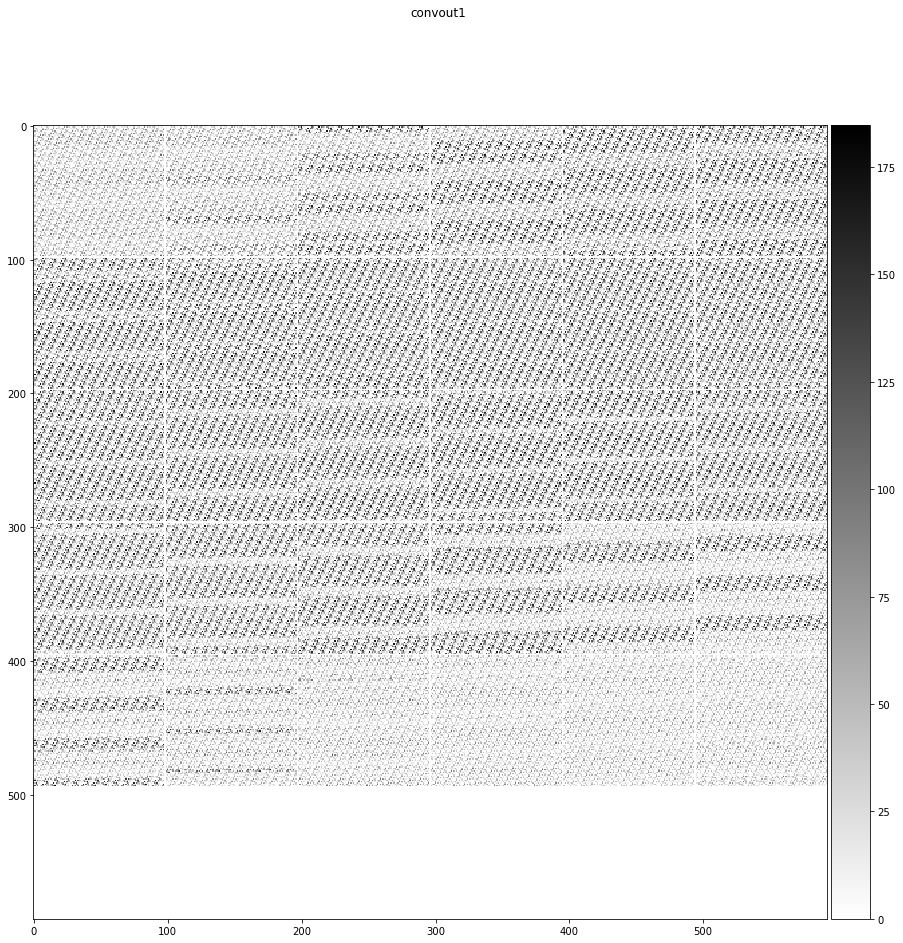

In [366]:
# Visualize convolution result (after activation)
C1 = convout1_f(test_peony2)
C1 = np.squeeze(C1)
CC1=C1.reshape(30,98,98)
print("C1 shape : ", CC1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(CC1, 6, 6), cmap=cm.binary)

In [368]:
CCC1=CC1.reshape(1,98,98,30)

In [371]:
# Visualize convolution result (after activation)
C2 = convout2_f(CCC1)
C2 = np.squeeze(C2)
CC2 = C2.reshape(30,98,98)
print("C2 shape : ", CC2.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout2')
nice_imshow(pl.gca(), make_mosaic(CC2, 6, 6), cmap=cm.binary)

ValueError: Cannot feed value of shape (1, 98, 98, 30) for Tensor 'conv2d_3_input:0', which has shape '(?, 100, 100, 3)'